In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("storm_data_search_results.csv")
pd.set_option('display.max_columns', None)
df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,STATE_ABBR,CZ_TIMEZONE,MAGNITUDE_TYPE,EPISODE_ID,CZ_TYPE,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,SOURCE,FLOOD_CAUSE,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,10042623,PENOBSCOT CO.,NaN,06/06/1953,1415,Tornado,0.0,F1,0,1,250,0,ME,CST,NaN,NaN,C,19,NaN,0,0,NaN,NaN,0.2,33,0,NaN,0,NaN,NaN,06/06/1953,1415,45.05,-69.30,NaN,NaN,NaN,NaN,1
1,10042624,CUMBERLAND CO.,NaN,07/07/1953,1145,Tornado,0.0,F0,0,1,0,0,ME,CST,NaN,NaN,C,5,NaN,0,0,NaN,NaN,1.0,7,0,NaN,0,NaN,NaN,07/07/1953,1145,43.82,-70.12,NaN,NaN,NaN,NaN,2
2,10042625,WALDO CO.,NaN,07/07/1954,1330,Tornado,0.0,F2,0,1,25000,0,ME,CST,NaN,NaN,C,27,NaN,0,0,NaN,NaN,7.6,10,0,NaN,0,NaN,NaN,07/07/1954,1330,45.28,-67.20,45.18,-67.28,NaN,NaN,3
3,10042626,AROOSTOOK CO.,NaN,08/11/1954,1727,Tornado,0.0,F2,1,1,25000,0,ME,CST,NaN,NaN,C,3,NaN,0,0,NaN,NaN,1.0,27,0,NaN,0,NaN,NaN,08/11/1954,1727,47.02,-68.02,NaN,NaN,NaN,NaN,4
4,10042627,CUMBERLAND CO.,NaN,06/20/1955,1500,Thunderstorm Wind,0.0,NaN,0,0,0,0,ME,CST,NaN,NaN,C,5,NaN,0,0,NaN,NaN,0.0,0,0,NaN,0,NaN,NaN,06/20/1955,1500,43.70,-70.28,NaN,NaN,NaN,NaN,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             500 non-null    int64  
 1   CZ_NAME_STR          500 non-null    object 
 2   BEGIN_LOCATION       0 non-null      float64
 3   BEGIN_DATE           500 non-null    object 
 4   BEGIN_TIME           500 non-null    int64  
 5   EVENT_TYPE           500 non-null    object 
 6   MAGNITUDE            500 non-null    float64
 7   TOR_F_SCALE          64 non-null     object 
 8   DEATHS_DIRECT        500 non-null    int64  
 9   INJURIES_DIRECT      500 non-null    int64  
 10  DAMAGE_PROPERTY_NUM  500 non-null    int64  
 11  DAMAGE_CROPS_NUM     500 non-null    int64  
 12  STATE_ABBR           500 non-null    object 
 13  CZ_TIMEZONE          500 non-null    object 
 14  MAGNITUDE_TYPE       0 non-null      float64
 15  EPISODE_ID           0 non-null      flo

Dropping columns with all null values or very few non-null values or values that would not contribute much to the model

In [3]:
df = df.drop(columns=['BEGIN_LOCATION', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'SOURCE', 'FLOOD_CAUSE', 'BEGIN_AZIMUTH', 'END_AZIMUTH', 'END_LOCATION', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE',
                'EPISODE_NARRATIVE', 'CZ_TYPE', 'STATE_ABBR', 'CZ_TIMEZONE'])
df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,ABSOLUTE_ROWNUMBER
0,10042623,PENOBSCOT CO.,06/06/1953,1415,Tornado,0.0,F1,0,1,250,0,19,NaN,0,0,0.2,33,0,0,06/06/1953,1415,45.05,-69.30,1
1,10042624,CUMBERLAND CO.,07/07/1953,1145,Tornado,0.0,F0,0,1,0,0,5,NaN,0,0,1.0,7,0,0,07/07/1953,1145,43.82,-70.12,2
2,10042625,WALDO CO.,07/07/1954,1330,Tornado,0.0,F2,0,1,25000,0,27,NaN,0,0,7.6,10,0,0,07/07/1954,1330,45.28,-67.20,3
3,10042626,AROOSTOOK CO.,08/11/1954,1727,Tornado,0.0,F2,1,1,25000,0,3,NaN,0,0,1.0,27,0,0,08/11/1954,1727,47.02,-68.02,4
4,10042627,CUMBERLAND CO.,06/20/1955,1500,Thunderstorm Wind,0.0,NaN,0,0,0,0,5,NaN,0,0,0.0,0,0,0,06/20/1955,1500,43.70,-70.28,5


Geocoding the latitude and longitude columns to get the location

In [4]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent = "kulkarni.dip@northeastern.edu")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_location(lat, lon):
    try:
        location = geolocator.reverse(str(lat) + ',' + str(lon))
        address = location.raw['address']
        if address.get('town', ''):
            return address.get('town', '')
        elif address.get('county', ''):
            return address.get('county', '')
        elif address.get('road', ''):
            return address.get('road', '')
        elif address.get('postcode', ''):
            return address.get('postcode', '')
        else:
            return address.get('state', '') if address else None
    except Exception as e:
        return None

df['BEGIN_LOCATION'] = df.apply(lambda row: get_location(row['BEGIN_LAT'], row['BEGIN_LON']), axis=1)
df.head(10)

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,WFO,INJURIES_INDIRECT,DEATHS_INDIRECT,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,ABSOLUTE_ROWNUMBER,BEGIN_LOCATION
0,10042623,PENOBSCOT CO.,06/06/1953,1415,Tornado,0.0,F1,0,1,250,0,19,NaN,0,0,0.2,33,0,0,06/06/1953,1415,45.05,-69.30,1,Dexter
1,10042624,CUMBERLAND CO.,07/07/1953,1145,Tornado,0.0,F0,0,1,0,0,5,NaN,0,0,1.0,7,0,0,07/07/1953,1145,43.82,-70.12,2,Freeport
2,10042625,WALDO CO.,07/07/1954,1330,Tornado,0.0,F2,0,1,25000,0,27,NaN,0,0,7.6,10,0,0,07/07/1954,1330,45.28,-67.20,3,Saint David Parish
3,10042626,AROOSTOOK CO.,08/11/1954,1727,Tornado,0.0,F2,1,1,25000,0,3,NaN,0,0,1.0,27,0,0,08/11/1954,1727,47.02,-68.02,4,Aroostook County
4,10042627,CUMBERLAND CO.,06/20/1955,1500,Thunderstorm Wind,0.0,NaN,0,0,0,0,5,NaN,0,0,0.0,0,0,0,06/20/1955,1500,43.70,-70.28,5,Cumberland County
5,10042628,YORK CO.,06/01/1956,1500,Tornado,0.0,F1,0,0,25000,0,31,NaN,0,0,1.0,13,0,0,06/01/1956,1500,43.42,-70.87,6,York County
6,10042629,KENNEBEC CO.,09/14/1956,1510,Tornado,0.0,F1,0,0,25000,0,11,NaN,0,0,18.7,17,0,0,09/14/1956,1510,44.30,-69.80,7,Kennebec County
7,10042630,CUMBERLAND CO.,06/19/1957,1330,Thunderstorm Wind,66.0,NaN,0,0,0,0,5,NaN,0,0,0.0,0,0,0,06/19/1957,1330,43.70,-70.28,8,Cumberland County
8,10042631,CO.,07/27/1957,2000,Hail,1.5,NaN,0,0,0,0,0,NaN,0,0,0.0,0,0,0,07/27/1957,2000,47.20,-67.90,9,Saint-Leonard Parish
9,10042632,AROOSTOOK CO.,09/16/1957,1330,Tornado,0.0,F2,0,0,2500,0,3,NaN,0,0,2.7,50,0,0,09/16/1957,1330,45.80,-68.30,10,Aroostook County


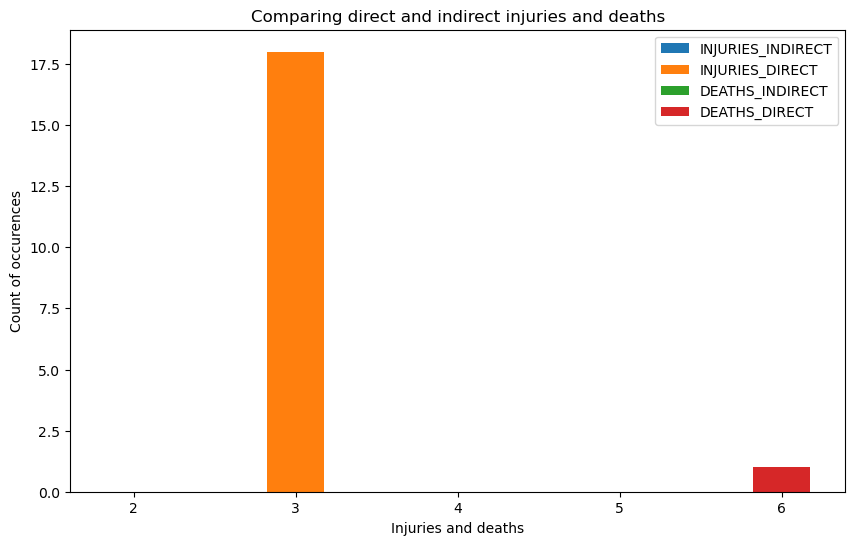

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))

bar_width = 0.35

ax.bar(2, df['INJURIES_INDIRECT'].sum(), bar_width, label='INJURIES_INDIRECT')
ax.bar(3, df['INJURIES_DIRECT'].sum(), bar_width, label='INJURIES_DIRECT')

ax.bar(5, df['DEATHS_INDIRECT'].sum(), bar_width, label='DEATHS_INDIRECT')
ax.bar(6, df['DEATHS_DIRECT'].sum(), bar_width, label='DEATHS_DIRECT')

ax.set_xlabel('Injuries and deaths')
ax.set_ylabel('Count of occurences')
ax.set_title('Comparing direct and indirect injuries and deaths')
ax.legend()

plt.show()

The plot shows that indirect injuries and indirect deaths have a sum of 0. We can merge these columns to form a single column for efficiency

In [6]:
df['DEATHS'] = df['DEATHS_DIRECT'] | df['DEATHS_INDIRECT']
df['INJURIES'] = df['INJURIES_DIRECT'] | df['INJURIES_INDIRECT']
df = df.drop(columns = ['DEATHS_DIRECT', 'DEATHS_INDIRECT', 'INJURIES_DIRECT', 'INJURIES_INDIRECT'])
df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,WFO,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,ABSOLUTE_ROWNUMBER,BEGIN_LOCATION,DEATHS,INJURIES
0,10042623,PENOBSCOT CO.,06/06/1953,1415,Tornado,0.0,F1,250,0,19,NaN,0.2,33,0,0,06/06/1953,1415,45.05,-69.30,1,Dexter,0,1
1,10042624,CUMBERLAND CO.,07/07/1953,1145,Tornado,0.0,F0,0,0,5,NaN,1.0,7,0,0,07/07/1953,1145,43.82,-70.12,2,Freeport,0,1
2,10042625,WALDO CO.,07/07/1954,1330,Tornado,0.0,F2,25000,0,27,NaN,7.6,10,0,0,07/07/1954,1330,45.28,-67.20,3,Saint David Parish,0,1
3,10042626,AROOSTOOK CO.,08/11/1954,1727,Tornado,0.0,F2,25000,0,3,NaN,1.0,27,0,0,08/11/1954,1727,47.02,-68.02,4,Aroostook County,1,1
4,10042627,CUMBERLAND CO.,06/20/1955,1500,Thunderstorm Wind,0.0,NaN,0,0,5,NaN,0.0,0,0,0,06/20/1955,1500,43.70,-70.28,5,Cumberland County,0,0


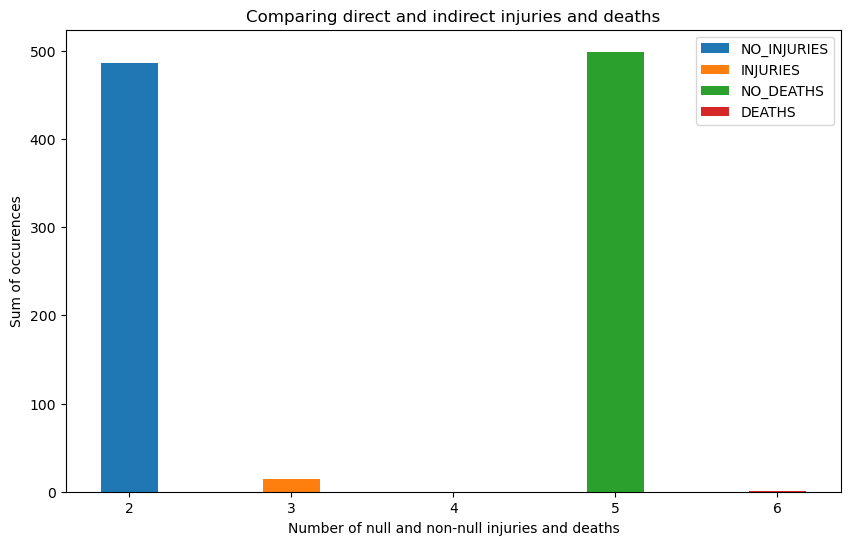

In [7]:
fig, ax = plt.subplots(figsize = (10, 6))

bar_width = 0.35

zero_injuries = (df['INJURIES'] == 0).sum()
not_zero_injuries = (df['INJURIES'] != 0).sum()

zero_deaths = (df['DEATHS'] == 0).sum()
not_zero_deaths = (df['DEATHS'] != 0).sum()

ax.bar(2, zero_injuries, bar_width, label='NO_INJURIES')
ax.bar(3, not_zero_injuries, bar_width, label='INJURIES')

ax.bar(5, zero_deaths, bar_width, label='NO_DEATHS')
ax.bar(6, not_zero_deaths, bar_width, label='DEATHS')

ax.set_xlabel('Number of null and non-null injuries and deaths')
ax.set_ylabel('Sum of occurences')
ax.set_title('Comparing direct and indirect injuries and deaths')
ax.legend()

plt.show()

The target columns are clearly not balanced. We can merge these two columns as well to a single column called bodily harm

In [8]:
df['BODILY_HARM'] = df['DEATHS'] | df['INJURIES']
df = df.drop(columns = ['DEATHS', 'INJURIES'])
df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,WFO,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,ABSOLUTE_ROWNUMBER,BEGIN_LOCATION,BODILY_HARM
0,10042623,PENOBSCOT CO.,06/06/1953,1415,Tornado,0.0,F1,250,0,19,NaN,0.2,33,0,0,06/06/1953,1415,45.05,-69.30,1,Dexter,1
1,10042624,CUMBERLAND CO.,07/07/1953,1145,Tornado,0.0,F0,0,0,5,NaN,1.0,7,0,0,07/07/1953,1145,43.82,-70.12,2,Freeport,1
2,10042625,WALDO CO.,07/07/1954,1330,Tornado,0.0,F2,25000,0,27,NaN,7.6,10,0,0,07/07/1954,1330,45.28,-67.20,3,Saint David Parish,1
3,10042626,AROOSTOOK CO.,08/11/1954,1727,Tornado,0.0,F2,25000,0,3,NaN,1.0,27,0,0,08/11/1954,1727,47.02,-68.02,4,Aroostook County,1
4,10042627,CUMBERLAND CO.,06/20/1955,1500,Thunderstorm Wind,0.0,NaN,0,0,5,NaN,0.0,0,0,0,06/20/1955,1500,43.70,-70.28,5,Cumberland County,0


In [9]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

encode_columns = ['CZ_NAME_STR', 'EVENT_TYPE', 'TOR_F_SCALE', 'WFO', 'BEGIN_DATE', 'END_DATE', 'BEGIN_LOCATION']
label_encode = {col: LabelEncoder() for col in encode_columns}

for col in encode_columns:
    df[col] = label_encode[col].fit_transform(df[col])

X = df.drop(columns = ['BEGIN_LOCATION'], axis=1)
y = pd.DataFrame(df['BEGIN_LOCATION'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DAMAGE_PROPERTY_NUM,DAMAGE_CROPS_NUM,CZ_FIPS,WFO,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,ABSOLUTE_ROWNUMBER,BEGIN_LOCATION,BODILY_HARM
0,10042623,10,27,1415,2,0.0,1,250,0,19,10,0.2,33,0,0,27,1415,45.05,-69.30,1,27,1
1,10042624,3,79,1145,2,0.0,0,0,0,5,10,1.0,7,0,0,79,1145,43.82,-70.12,2,38,1
2,10042625,14,80,1330,2,0.0,2,25000,0,27,10,7.6,10,0,0,80,1330,45.28,-67.20,3,90,1
3,10042626,1,163,1727,2,0.0,2,25000,0,3,10,1.0,27,0,0,163,1727,47.02,-68.02,4,4,1
4,10042627,3,49,1500,1,0.0,3,0,0,5,10,0.0,0,0,0,49,1500,43.70,-70.28,5,25,0


We tried running a model with multiple targets such as BODILY_HARM as well as DAMAGE_PROPERTY_NUM and DAMAGE_CROPS_NUM
However due to the sparcity in data the model did not have a good score
Due to limited data the current model does not have a great score either

In [11]:
from sklearn.multioutput import MultiOutputRegressor

model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)

predictions1 = model1.predict(X_test)

/Users/dipti/mambaforge/envs/hpc/lib/python3.12/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
model1.score(X_test, y_test)

0.3947493060664534

We tried to implement a neural network to tackle the problem of data scarcity

In [13]:
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.losses import SparseCategoricalCrossentropy
from keras.models import Model
from keras.metrics import AUC  # Import AUC for evaluating performance

# Assuming y_train is one-hot encoded; if not, use to_categorical
num_classes = len(np.unique(y_train))  # Number of classes in the categorical target

# Define loss function
loss_function = SparseCategoricalCrossentropy()

# Create a Sequential model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))


# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer with num_classes neurons and softmax activation for categorical outputs
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=loss_function, metrics=[AUC()])  # Use AUC or any suitable metrics

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 104)            │         3,432 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,376 (40.53 KB)

 Trainable params: 10,376 (40.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

In [10]:
# Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Trimming to match number of samples
if X_train.shape[0] < y_train.shape[0]:
    y_train = y_train.iloc[:X_train.shape[0]]
elif X_train.shape[0] > y_train.shape[0]:
    X_train = X_train.iloc[:y_train.shape[0]]

# Optional: Drop NaN columns
X_train = X_train.dropna(axis=1, how='any')
y_train = y_train.dropna(axis=1, how='any')

# Verify shapes after adjustments
print("Adjusted shape of X_train:", X_train.shape)
print("Adjusted shape of y_train:", y_train.shape)


Shape of X_train: (400, 21)
Shape of y_train: (400, 1)
Adjusted shape of X_train: (400, 21)
Adjusted shape of y_train: (400, 1)
